# P2项目（泰坦尼克号数据集）

## 简介

这是一个探索数据集的一个入门项目，我毫不犹豫的选择了泰坦尼克号数据，这是包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口数据和乘客基本信息。还记得是读大学时候电影院看的这部电影（不小心暴露了年龄），心里留下宏博大片的深刻印象；也还记得一篇文章说泰坦尼克号事件体现了西方人（或者说英国绅士精神）人性的光辉巴拉巴拉......这次能用数据和科学的方法来做探索和判断，让人拭目以待。

报告目录
1. 提出问题
2. 数据导入和观察
3. 数据处理（清洗）
4. 数据分析（可视化分析）
5. 结论

程序代码编写尽量遵循[PEP8](http://wiki.jiayun.org/PEP_8_--_Style_Guide_for_Python_Code)， 如果有未完全遵守的地方，请老师包涵。

参考：
https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner


# 1.提出问题

有哪些因素(客舱登记、年龄、性别、同行伙伴、同行家人、上船港口等)会影响泰坦尼克上的人的生还率？

# 2.数据导入和观察


In [29]:

#啥也不用说，先导库
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#为了可默认在notebook中显示图像，
%matplotlib inline 

#导入数据
titanic = pd.read_csv("titanic-data.csv")

## 2.1探索数据

In [2]:
#看数据集的全部字段的描述信息
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
titanic.info()#查看数据集概要信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic.columns#12个字段名称

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
titanic.dtypes#12字段数据类型

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic.head()#显示头五行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.isnull().sum()#各字段缺失数据的数量

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

初始观察结论：

1.有891个数据和12个字段

2.没有NaN值，Age这个字段对分析重要且缺失177个需要补充

3.Cabin字段缺失687个, 缺失77%，缺失太多且对分析没有太大帮助可以清除，常识判断Name,Ticket和Fare也对分析作用不大，可以清除

4.Embarked这个字段只缺失2个对分析影响不是很大，不做补充操作


# 3.数据处理 (清洗和数据缺失值处理）


In [8]:
titanic = titanic.drop(['Cabin'], axis = 1) # 移除 Cabin
titanic = titanic.drop(['Name'], axis = 1) # 移除 Name
titanic = titanic.drop(['Ticket'], axis = 1) # 移除 Ticket
titanic = titanic.drop(['Fare'], axis = 1) # 移除 Fare
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [9]:
age_median_sex = titanic.groupby("Sex").Age.median()#按性别将男性，女性分组，然后各自计算中位数

titanic.set_index('Sex', inplace=True)#设置原数据集的索引为“Sex”

titanic.Age.fillna(age_median_sex,inplace=True)#分别用男女各自年龄的中位数来填补,inplace=True表示在原数据titanic_df上直接进行修改

titanic.reset_index(inplace=True)#重置索引，取消Sex索引

titanic.Age.describe()# 查看Age列的描述统计值

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

# 4.数据分析（可视化分析）

891人中，幸存和未幸存的人数和比例？

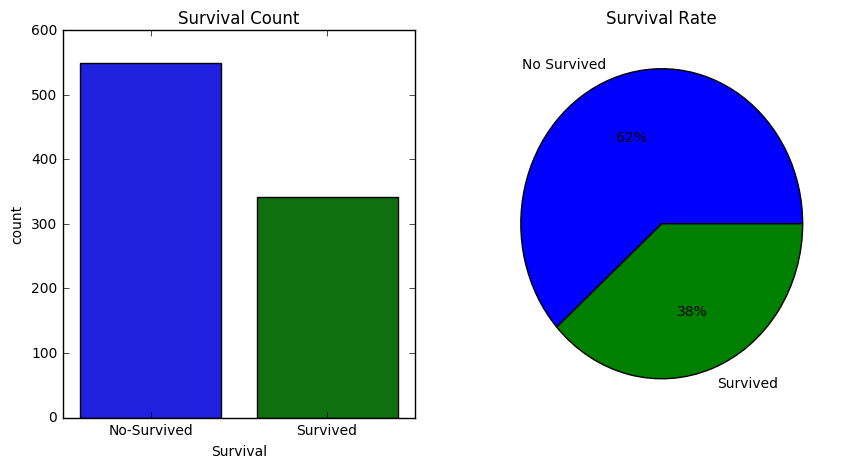

In [40]:
total_survived= titanic['Survived'].sum()
total_no_survived = 891 - total_survived

#为了让图显示"No-Survived"和"Survived"而不是0和1
titanic['SurvivedName'] = titanic['Survived'].\
                          map({0:"No-Survived",1:"Survived"})

#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize = (10,5))#创建画布
plt.subplot(121)#添加第1个子图
sns.countplot(x='SurvivedName', data=titanic)#X轴统计数据列
plt.xlabel("Survival")#X轴标签
plt.title('Survival Count')

plt.subplot(122)#添加第2个子图
#autopct自动转为百分比
plt.pie([total_no_survived, total_survived],\
        labels=['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survival Rate') 

plt.show()

结论：891人中，62%的人未能幸存，真是损失惨重，深刻的教训！

## 4.1 如下分别是分析Pclass、Sex、Age等与幸存率的关系：

### 4.1.1 Pclass(仓位等级）与幸存率（Survived）的关系：

In [11]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
#计算不同仓的人数
titanic.pivot_table(values="PassengerId",index="Pclass",aggfunc="count")

,PassengerId
Pclass,
1,216
2,184
3,491


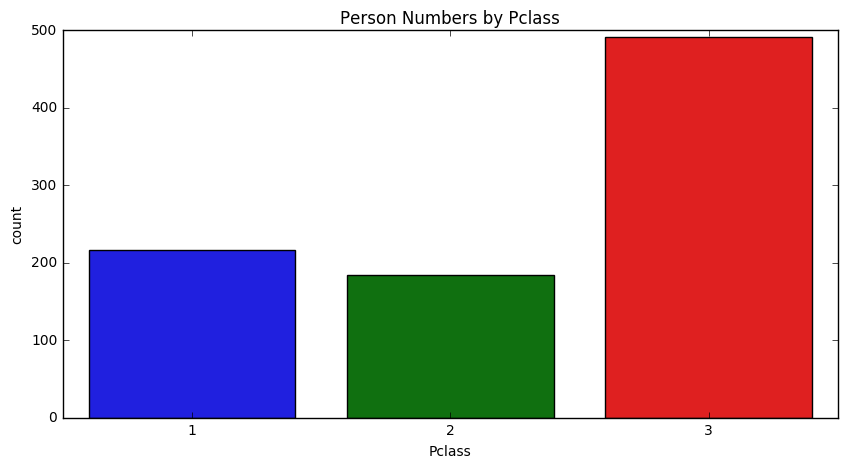

In [12]:
plt.figure(figsize= (10, 5))#创建画布
sns.countplot(x='Pclass', data=titanic)#画不同仓的人数
plt.title('Person Numbers by Pclass')

plt.show()

我想得出一个“船上还是穷人多”的结论，呵呵。

In [13]:
titanic.pivot_table(values="Survived",index="Pclass",aggfunc=np.mean)#不同仓生还百分比

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


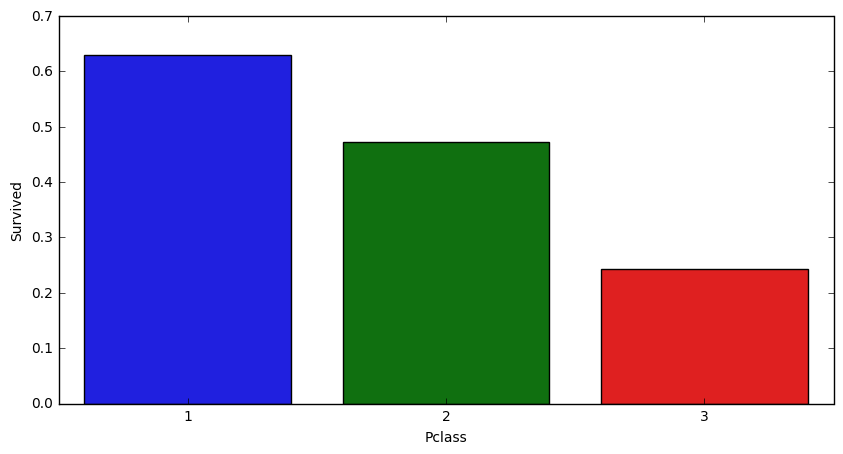

In [14]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
plt.figure(figsize= (10 ,5))
sns.barplot(data=titanic,x="Pclass",y="Survived",ci=None)#ci表示置信区间，画不同仓生还百分比

plt.show()

结论：生还率：头等仓 > 二等 > 三等，头等仓乘客（有钱阶级）受到照顾(可能分配给他们更多的救生艇或有优先权上救生艇）。 我根据常识和电影印象，认为三等仓生还率低也跟仓在船下面，乘客不容易上到甲板等原因有关。

### 4.1.2 Sex(性别）与幸存率（Survived）的关系：

In [15]:
titanic.pivot_table(values="PassengerId",index="Sex",aggfunc="count")

,PassengerId
Sex,
female,314
male,577


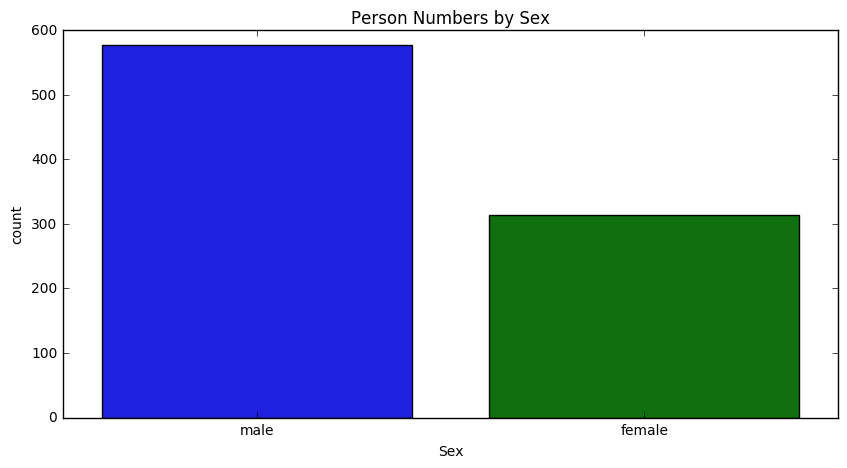

In [16]:
plt.figure(figsize= (10, 5))
sns.countplot(x='Sex', data=titanic)
plt.title('Person Numbers by Sex')

plt.show()

船上男性人数几乎是女性的一倍。

In [17]:
titanic.pivot_table(values="Survived",index="Sex",aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


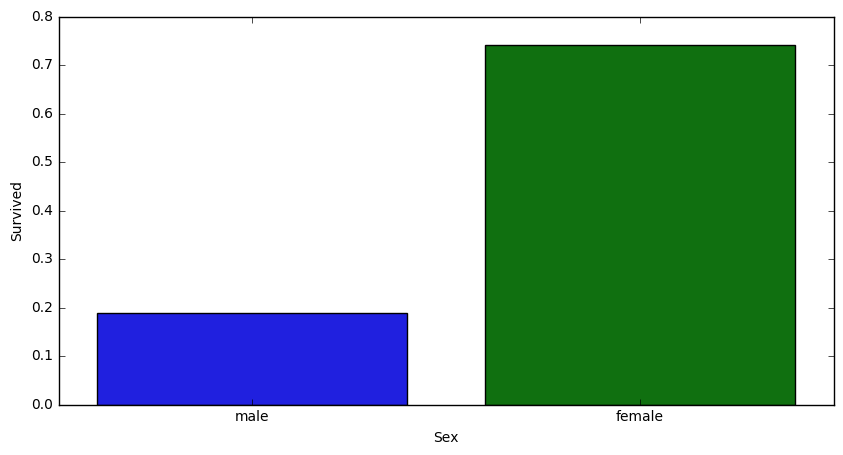

In [18]:
plt.figure(figsize= (10 ,5))
sns.barplot(data=titanic,x="Sex",y="Survived",ci=None)

plt.show()

结论：女性的生还几率要远大于男性，说明船上广大男性的确是发扬了照顾妇女的传统。

### 4.1.3 Age(年龄）与幸存率（Survived）的关系：
把年龄根据常识分为Baby，Child，Teenager，Adult和Senior还有UnKnow。

In [5]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
#根据年龄划分6个年龄段和标注位常识名称
bins = [-1, 0, 5, 12, 18, 60, np.inf]
labels = ['UnKnown', 'Baby', 'Child', 'Teenager', 'Adult', 'Senior']
titanic["AgeGroup"]=pd.cut(titanic["Age"], bins, labels = labels)
titanic.AgeGroup.value_counts(sort=False)#查看每个分组有多少人数

UnKnown       0
Baby         44
Child        25
Teenager     70
Adult       553
Senior       22
Name: AgeGroup, dtype: int64

In [32]:
#UnKnown不存在，所以取消
bins = [0, 5, 12, 18, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Adult', 'Senior']
titanic["AgeGroup"]=pd.cut(titanic["Age"], bins, labels = labels)

In [8]:
titanic.pivot_table(values="Survived",index="AgeGroup",aggfunc=np.mean)

,Survived
AgeGroup,
Baby,0.704545
Child,0.360000
Teenager,0.428571
Adult,0.388788
Senior,0.227273


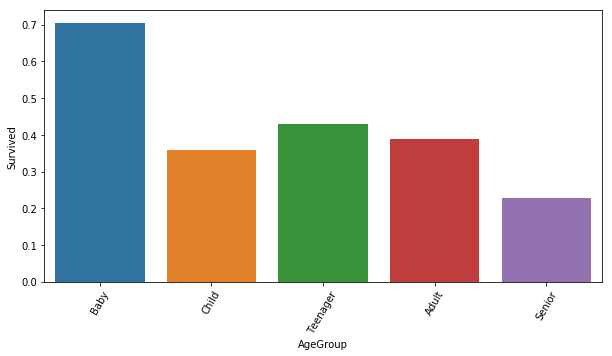

In [9]:
plt.figure(figsize= (10 ,5))
sns.barplot(data=titanic,x="AgeGroup",y="Survived",ci=None)
plt.xticks(rotation=60)#改改角度好看一点

plt.show()

结论：宝宝们受到特殊照顾有比较高的生还率，儿童和青少年并没有受到照顾和普通成年人生还率类似，老年人生还率低说明并没有按照中国人”尊老爱幼“习惯受到照顾。

### 4.1.4 SibSP（同行伙伴数量）与幸存率（Survived）的关系：
“
sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)
”
来自kaggle的说明

In [22]:
titanic.pivot_table(values="Survived",index="SibSp",aggfunc=np.mean)

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


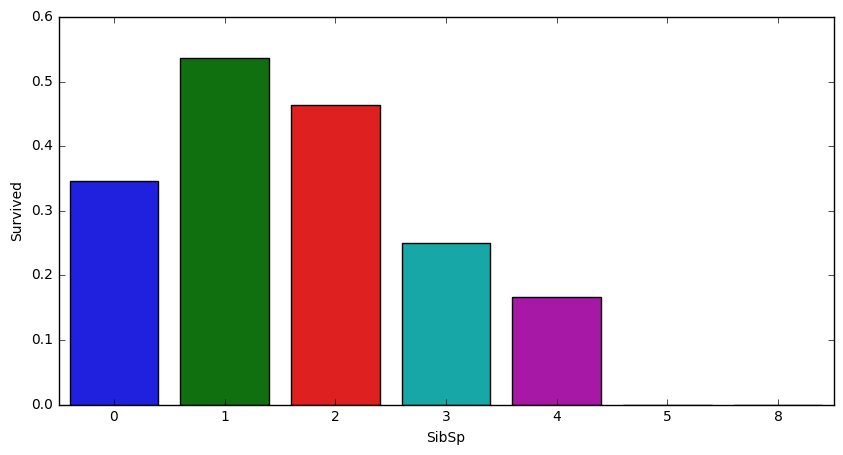

In [23]:
plt.figure(figsize= (10, 5))
sns.barplot(data=titanic,x="SibSp",y="Survived",ci=None)

plt.show()

结论：有1-2个结伴同行的生还率高，高过一个人独行；同行伙伴过多有3-4个反而生还率下降。

### 4.1.5 Parch(同行家庭人数）与幸存率（Survived）的关系
“
parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.
“
来自kaggle的说明

In [24]:
titanic.pivot_table(values="PassengerId",index="Parch",aggfunc="count")

,PassengerId
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


In [25]:
titanic.pivot_table(values="Survived",index="Parch",aggfunc=np.mean)

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


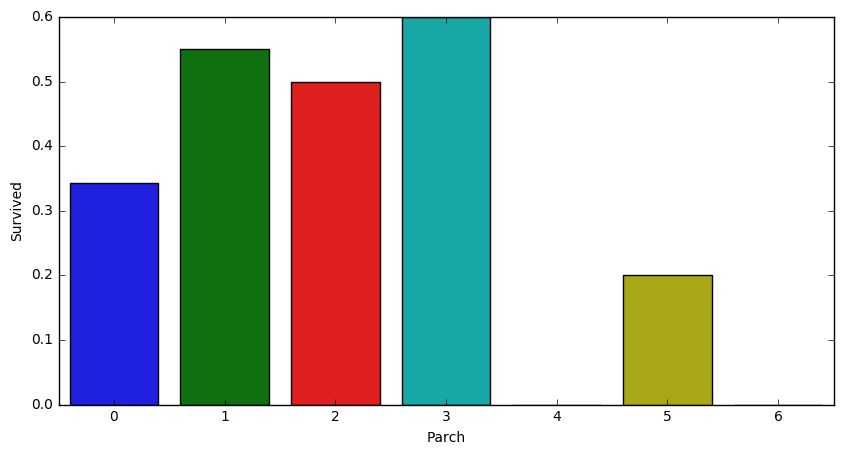

In [26]:
plt.figure(figsize= (10, 5))
sns.barplot(data=titanic,x="Parch",y="Survived",ci=None)

plt.show()

结论：有1-3个家庭成员的生存率高，孩子过多的生还率低。

### 4.1.6 Embarked(上船地点）与幸存率（Survived）的关系：
“embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton”
来自Kaggle说明 

In [27]:
titanic.pivot_table(values="Survived",index="Embarked",aggfunc=np.mean)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


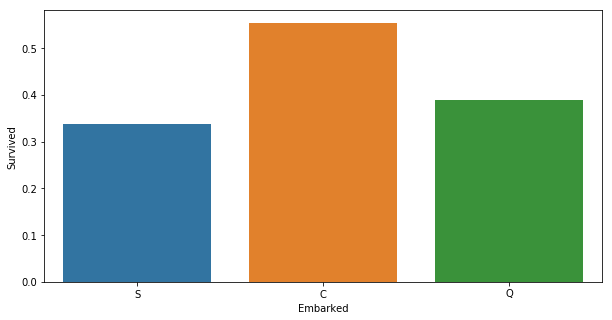

In [42]:
plt.figure(figsize= (10, 5))
sns.barplot(data=titanic,x="Embarked",y="Survived",ci=None)

plt.show()

结论：Cherbourg登船的生还率高。是因为这里的人坐头等仓多或携带Baby多吗？

### 4.1.7 综合Age(年龄），Sex（性别）与生还率（Survived）关系

In [10]:
#除了年龄组作为index，还加了性别作为column
titanic.pivot_table(values="PassengerId",index="AgeGroup",columns="Sex",aggfunc="count")

Sex,female,male
AgeGroup,,
Baby,21,23
Child,11,14
Teenager,36,34
Adult,190,363
Senior,3,19


In [11]:
titanic.pivot_table(values="Survived",index="AgeGroup",columns="Sex",aggfunc=np.mean)

Sex,female,male
AgeGroup,,
Baby,0.761905,0.652174
Child,0.272727,0.428571
Teenager,0.750000,0.088235
Adult,0.778947,0.184573
Senior,1.000000,0.105263


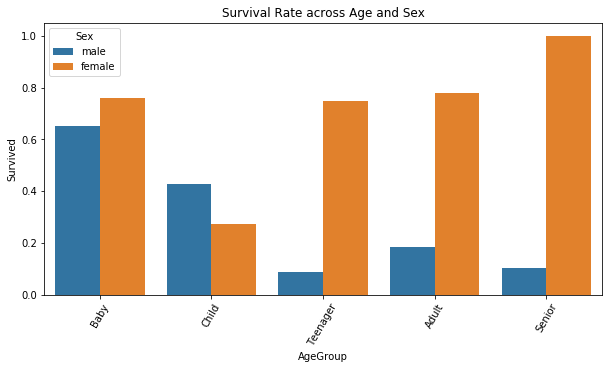

In [48]:
#https://seaborn.pydata.org/generated/seaborn.pointplot.html
plt.figure(figsize = (10, 5))
#sns.pointplot(data=titanic,x="AgeGroup",y="Survived",hue="Sex",ci=None,
#             markers=["^", "o"], linestyles=["-", "--"])
sns.barplot(data=titanic,x="AgeGroup",y="Survived",hue="Sex",ci=None)
plt.xticks(rotation=60)
plt.title("Survival Rate across Age and Sex")

plt.show()

结论：除了Child年龄组，其它各年龄组都是女性的生还率高。

### 4.1.7 Age(年龄），Sex（性别），Pclass（仓位等级）与生还率（Survived）关系

In [13]:
titanic.pivot_table(values="PassengerId",index="AgeGroup",columns=["Sex","Pclass"],aggfunc="count")

Sex      female              male             
Pclass        1     2     3     1     2      3
AgeGroup                                      
Baby        1.0   5.0  15.0   2.0   8.0   13.0
Child       NaN   3.0   8.0   1.0   1.0   12.0
Teenager   10.0   6.0  20.0   2.0   6.0   26.0
Adult      72.0  60.0  58.0  84.0  81.0  198.0
Senior      2.0   NaN   1.0  12.0   3.0    4.0

In [14]:
titanic.pivot_table(values="Survived",index="AgeGroup",columns=["Sex","Pclass"],aggfunc=np.mean)

Sex         female                     male                    
Pclass           1    2         3         1         2         3
AgeGroup                                                       
Baby      0.000000  1.0  0.733333  1.000000  1.000000  0.384615
Child          NaN  1.0  0.000000  1.000000  1.000000  0.333333
Teenager  1.000000  1.0  0.550000  0.500000  0.000000  0.076923
Adult     0.972222  0.9  0.413793  0.416667  0.061728  0.136364
Senior    1.000000  NaN  1.000000  0.083333  0.333333  0.000000

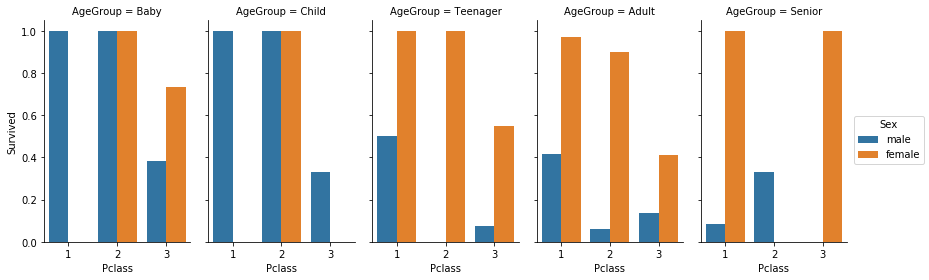

In [51]:
#https://seaborn.pydata.org/generated/seaborn.factorplot.html

'''
sns.FacetGrid(data=titanic,row="AgeGroup",aspect=1.9)\
    .map(sns.barplot,"Pclass","Survived","Sex",hue_order=["male","female"],\
         ci=None, palette="deep")
'''

#还是factorplot画出来的漂亮些
sns.factorplot(data=titanic,x="Pclass",y="Survived",hue="Sex",\
              ci=None,col="AgeGroup",kind="bar",aspect=.6)

plt.show()

结论：除了Baby和Child组外（幼小年龄，一般也不区分性别对待），不同等级仓都是女性生还率大于男性，头等仓男女生还率都大于二等和三等(老年组男性除外，说明他们是有钱又有人格的好老头。

# 5.总结

这次分析主要是泰坦尼克上的生还率和各因素（客舱等级、性别、年龄、同行伙伴、随同子女等）的关系。

在891个样本的分析中，男性514人，女性377人，最小年龄0.42岁，最大80岁，头等仓216人，二等仓184人，三等仓491人，38%的生还率。

比较明显的结论是头等仓、女性、Baby的生还率高。

另外：有1-2名同行伙伴，携带1-3个子女，Cherbourg登船的生还率也高些。

总体样本2224人，抽样样本891，如果是做到了随机抽取的，由中心极限定理可以判断抽样样本分析有代表性。

但结论仅仅是从抽样样本数据角度分析得出，分析结果具有局限性，生还率实际往往由多个因素决定。
